<b>Árboles de decisión</b><br>
Los árboles de decisión son un algoritmo de aprendizaje automático que se utiliza en la ciencia de datos para procesar grandes volúmenes datos y solventar problemas.<br>
Los árboles de decisión son algoritmos estadísticos o técnicas de machine learning que nos permiten la construcción de modelos predictivos de analítica de datos para el Big Data basados en su clasificación según ciertas características o propiedades, o en la regresión mediante la relación entre distintas variables para predecir el valor de otra.<br>
En los modelos de clasificación queremos predecir el valor de una variable mediante la clasificación de la información en función de otras variables (tipo, pertenencia a un grupo…). Por ejemplo, queremos pronosticar qué personas comprarán un determinado producto, clasificando entre clientes y no clientes, o qué marcas de portátiles comprará cada persona mediante la clasificación entre las distintas marcas. <br>Los valores a predecir son predefinidos, es decir, los resultados están definidos en un conjunto de posibles valores.<br>
En los modelos de regresión se intenta predecir el valor de una variable en función de otras variables que son independientes entre sí. Por ejemplo, queremos predecir el precio de venta del terreno en función de variables como su localización, superficie, distancia a la playa, etc. El posible resultado no forma parte de un conjunto predefinido, sino que puede tomar cualquier posible valor.<br>
El árbol de decisión es una estructura que está formada por ramas y nodos de distintos tipos:<br>
•	Los nodos internos representan cada una de las características o propiedades a considerar para tomar una decisión.<br>
•	Las ramas representan la decisión en función de una determinada condición (p. ej. probabilidad de ocurrencia).<br>
•	Los nodos finales representan el resultado de la decisión.<br>
<b>¿Para qué se utilizan los árboles de decisión?</b><br>
Los árboles de decisión se emplean generalmente en Big Data para predecir la probabilidad de conseguir un determinado resultado en base a ciertas condiciones (incertidumbre). Ejemplos típicos de la utilización de este tipo de algoritmos son:
•	Hacer estimaciones de las primas de seguros a cobrar a los asegurados.<br>
•	Predecir si se le debe ofrecer un determinado producto a una persona.<br>
Con el árbol de decisión obtenemos una solución al problema, determinando la Clasificación (Alerta, Buen estudiante, Desertor) según la Nota Matemáticas y Nota Lecto Escritura. En muchas ocasiones, hay incertidumbre en cada una de las posibles decisiones y no tenemos valores definidos y que se puedan obtener de manera fiable. Por ejemplo, cuando trabajamos con probabilidades, es por lo que se utilizan determinados criterios de decisión bajo incertidumbre. <br>
Utilizaremos la librería Scikit-learn, que es uno de los open-source y bibliotecas de aprendizaje automático más populares en Python. La biblioteca scikit-learn contiene muchas herramientas eficientes para aprendizaje automático y modelado estadístico, incluyendo clasificación, regresión, agrupación, y reducción de dimensionalidad.<br>
Para generar el árbol de decisión en Python utilizando ciencia de datos a partir de los datos en formato Excel, seguiremos los siguientes pasos:<br>


In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

# Cargar los datos
data = pd.read_excel('Dataset_final.xlsx')  # Asegúrate de reemplazar "tu_archivo_de_datos.csv" con el nombre de tu archivo de datos


# Crear la columna "Clasificación" con los valores correspondientes
data['Clasificación'] = ''

#Recorremos el Dataset para asignar los valores
#El resultado será un DataFrame con las columnas originales y 
# la nueva columna "Clasificación" que contiene las clasificaciones
# "Buen Estudiante", "Alerta" o "Desertor" según las notas de matemáticas
# y lecto escritura.
for i in range(len(data)):
    if data.loc[i, 'Nota Matematicas'] > 3 and data.loc[i, 'Nota Lecto Escritura'] > 3:
        data.loc[i, 'Clasificación'] = 'Buen Estudiante'
    elif data.loc[i, 'Nota Matematicas'] == 3 and data.loc[i, 'Nota Lecto Escritura'] == 3:
        data.loc[i, 'Clasificación'] = 'Alerta'
    else:
        data.loc[i, 'Clasificación'] = 'Desertor'

# Imprimir el Dataset ampliando los atributos de las columnas
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 8,
                       ):
    print(data)


# Dividir los datos en características (X) y variable objetivo (y)
X = data[['Nota Matematicas', 'Nota Lecto Escritura']]
y = data['Clasificación']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier()

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

# Generar el árbol de decisión en un archivo de imagen (requiere la biblioteca graphviz)
tree.export_graphviz(model, out_file='tree.dot', feature_names=['Nota Matemáticas', 'Nota Lecto Escritura'], class_names=data['Clasificación'].unique())

# También puedes visualizar el árbol utilizando la biblioteca matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(model, feature_names=['Nota Matematicas', 'Nota Lecto Escritura'], class_names=data['Clasificación'].unique(), filled=True, ax=ax)
plt.show()

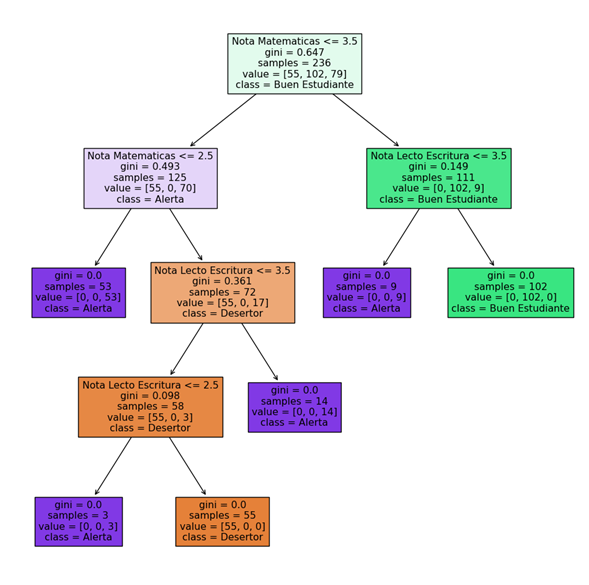

El árbol de decisión generado proporciona una representación gráfica de las reglas de clasificación que se aplican a los datos. Cada nodo en el árbol representa una pregunta o una condición sobre las características, y las ramas salientes representan las posibles respuestas a esa pregunta.
En este caso, el árbol de decisión se basa en las variables "Nota Matemáticas" y "Nota Lecto Escritura" para clasificar los datos en la variable objetivo "Clasificación".<br>
La interpretación del árbol de decisión implica seguir las ramas desde el nodo raíz hasta las hojas, siguiendo las condiciones especificadas en cada nodo. A medida que se desciende por el árbol, se llega a las hojas que contienen la clasificación final para un conjunto específico de características.<br>
Cada nodo interno del árbol tiene una pregunta o condición sobre una de las características. Por ejemplo, un nodo podría preguntar "¿La Nota Matemáticas es menor o igual a 3.5?" Si la respuesta es "sí", se sigue la rama "verdadera"; de lo contrario, se sigue la rama "falsa". Esto continúa hasta que se llega a una hoja, que representa la clasificación final.
La información de cada nodo es la siguiente:<br>
•	condición: si es un nodo donde se toma alguna decisión<br>
•	gini: es una medida de impureza. Cuando Gini vale 0, significa que ese nodo es totalmente puro. La impureza se refiere a cómo de mezcladas están las clases en cada nodo.<br>
•	samples: número de muestras que satisfacen las condiciones necesarias para llegar a este nodo<br>
•	value: cuántas muestras de cada clase llegan a este nodo<br>
•	class: qué clase se le asigna a las muestras que llegan a este nodo<br>
La interpretación del árbol de decisión también puede incluir el análisis de la importancia relativa de las características en el proceso de toma de decisiones. Algunos árboles de decisión proporcionan una medida de importancia para cada característica, lo que indica su contribución al modelo de clasificación.<br>
Además, el árbol de decisión puede ser útil para identificar patrones y relaciones entre las características y la clasificación. Al observar las ramas y los nodos del árbol, se pueden obtener ideas sobre las combinaciones de características que conducen a diferentes resultados de clasificación.<br>
Es importante recordar que la interpretación de un árbol de decisión debe realizarse en el contexto del problema y el conjunto de datos específico. Dependiendo de la complejidad del árbol y la cantidad de datos utilizados para entrenarlo, la interpretación puede variar. También es recomendable validar y evaluar el modelo utilizando técnicas adicionales, como la validación cruzada o la matriz de confusión, para obtener una comprensión más completa del rendimiento y las características importantes del árbol de decisión.<br>
Los árboles de decisión son algoritmos fácilmente entendibles y que funcionan bien en modelos analíticos basados en clasificación o regresión para obtener resultados a un problema. Son una técnica o algoritmo de machine learning ampliamente utilizado para trabajar con el Big Data, especialmente en el caso de campañas o estrategias de marketing.

